In [1]:
#Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

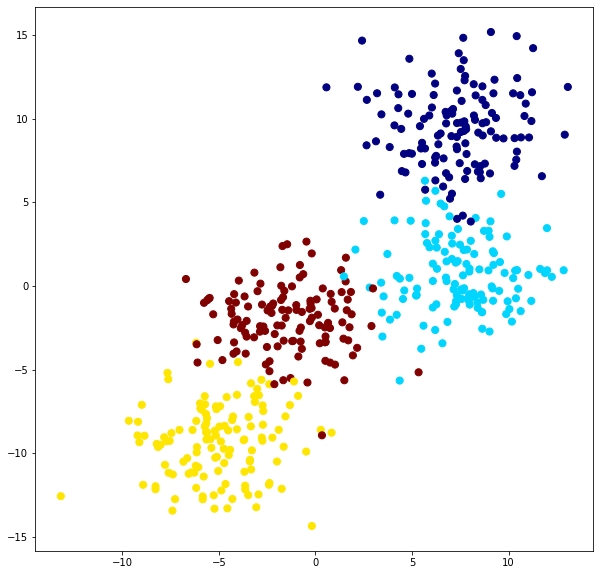

In [2]:
# 架空のデータを用意します。
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=4,
                  random_state=8, cluster_std=2.2)

#Scatter plot the points
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    決定木の可視化をします。
    INPUTS: 分類モデル, X, y, optional x/y limits.
    OUTPUTS: Meshgridを使った決定木の可視化
    '''
    # fitを使ったモデルの構築
    classifier.fit(X, y)
    
    # 軸を自動調整
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # meshgridをつくります。
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # 分類器の予測をZとして保存
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # meshgridを使って、整形します。
    Z = Z.reshape(xx.shape)
    
    # 分類ごとに色を付けます。
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    
    # 訓練データも描画します。
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        境界線を描き込みます。
        '''
        if i < 0:
            return

        tree = classifier.tree_
        
        # 境界を描画するために、再帰的に呼び出します。
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

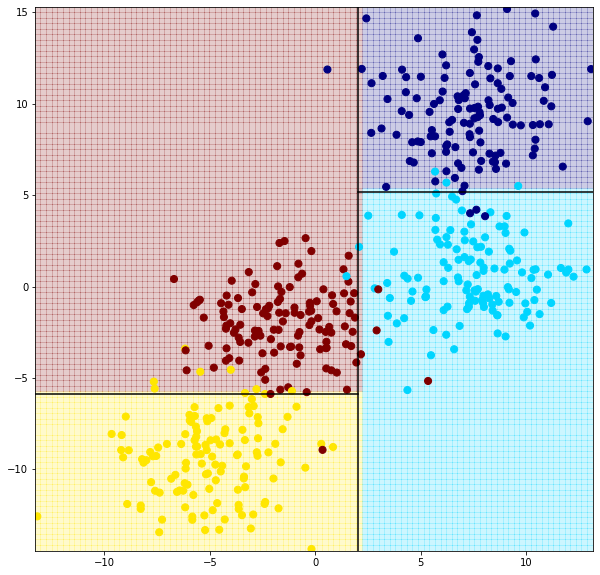

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=0)

# 描画します。
visualize_tree(clf,X,y)

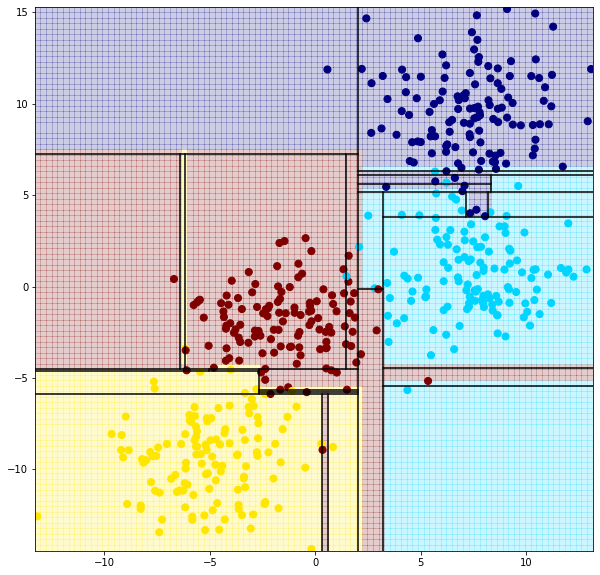

In [6]:
# モデルを作ります。
clf1 = DecisionTreeClassifier(max_depth=6,random_state=0)

# 描画します。
visualize_tree(clf1,X,y)

In [7]:
import pydotplus
import os
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        clf,
        out_file=os.path.join("text_classification.dot"),
        class_names=['1', '2','3','4'],
        rounded=True,
        filled=True
    )


In [8]:

with open("random.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)

In [9]:
data = export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(data)
graph.write_pdf("random.pdf")

True

In [10]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

export_graphviz(
        clf,
        out_file=os.path.join("text_classification.dot"),
        class_names=['1', '2','3','4'],
        rounded=True,
        filled=True
    )


In [11]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

from sklearn.datasets import load_iris
iris = load_iris()
x1=iris.data
y1=iris.target

In [12]:
iris_clf= DecisionTreeClassifier(max_depth=4,random_state=0)
iris_clf.fit(x1,y1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [13]:
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:¥Program Files(x86)¥Graphviz2.38¥bin¥'
iris_clf = DecisionTreeClassifier().fit(iris.data, iris.target)

In [14]:
with open("iris.dot", 'w') as f:
    f = export_graphviz(iris_clf, out_file=f)

In [15]:
dot_data = export_graphviz(iris_clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("iris.pdf")

True